# Options of builtin image viewer

This notebook will guide us through the options that are available to display images. To get started, let's import stuff..

In [1]:
from pvinspect import data

In [2]:
seq = data.demo.poly10x6(N=4)

100%|██████████| 4/4 [00:00<00:00, 132.62it/s]


# Clipping

By default, images are clipped below the 0.001-th and above the 99.999-th percentile. This is to get rid of outliers that might otherwise make the image appear very dark or even black:

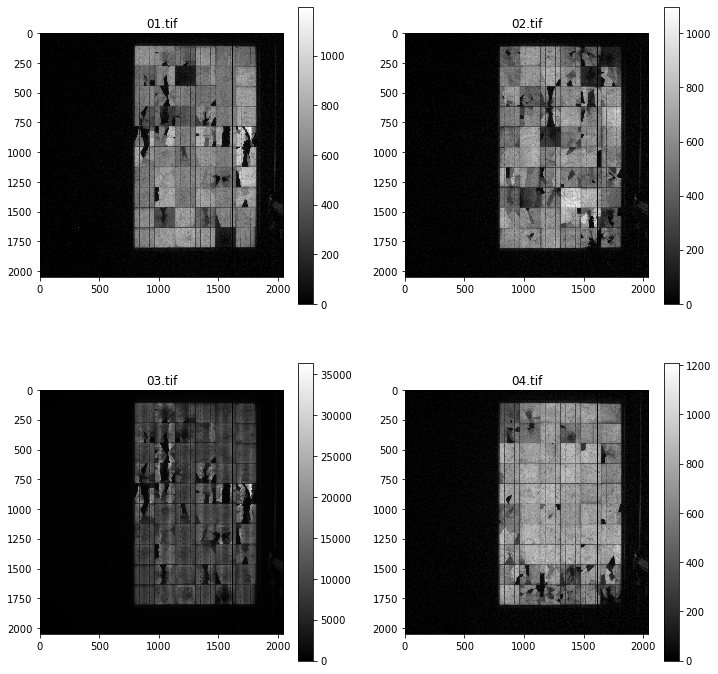

In [3]:
seq.head()

You can turn this off using the `clip_low` and `clip_high` options:

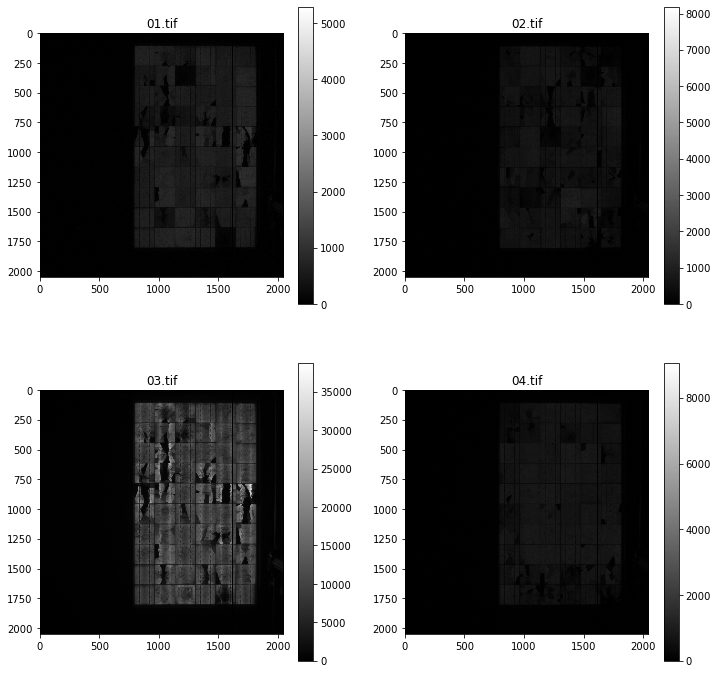

In [4]:
seq.head(clip_low=None, clip_high=None)

Of course, these options are available on single images as well:

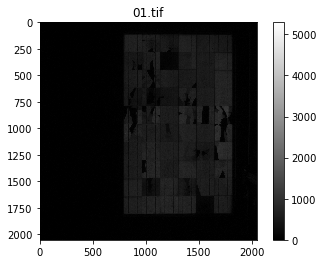

In [6]:
# access a single image
img = seq[0]

# show
img.show(clip_high=None)

And you can adjust them to your needs like this:

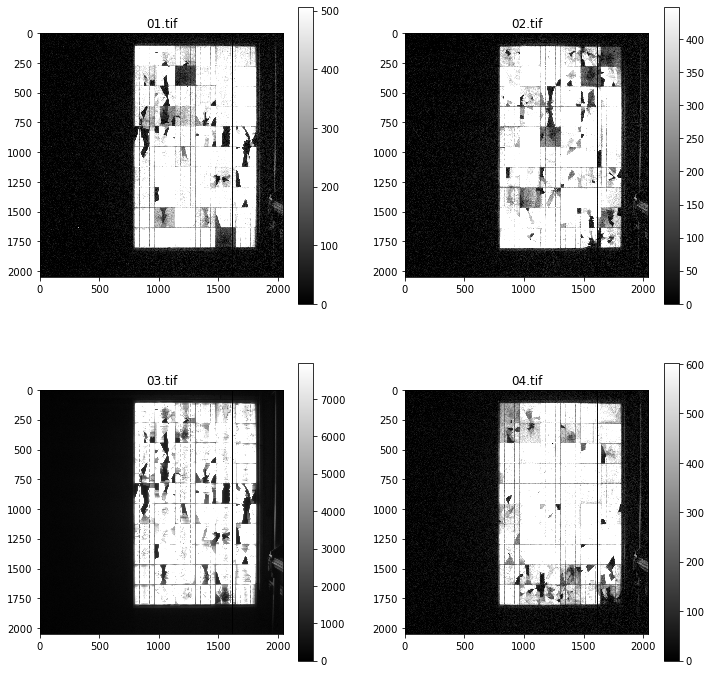

In [5]:
seq.head(clip_high=75)